In [1]:
import numpy as np
import pandas as pd
import seaborn as sp
import matplotlib.pyplot as pl

In [2]:
df=pd.read_csv("garments_worker_productivity.csv")
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sweing,Thursday,8,0.80,26.16,1009,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,1056,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sweing,Thursday,11,0.80,11.41,953,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sweing,Thursday,12,0.80,11.41,948,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sweing,Thursday,6,0.80,25.90,905,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [4]:
(df['no_of_workers']-df['no_of_workers'].min()) / (df['no_of_workers'].max()-df['no_of_workers'].min())

0       0.655172
1       0.068966
2       0.327586
3       0.327586
4       0.620690
          ...   
1192    0.068966
1193    0.068966
1194    0.068966
1195    0.149425
1196    0.045977
Name: no_of_workers, Length: 1197, dtype: float64

In [5]:
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,0.056439,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.038920,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.024322,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,0.056439,0.038920,-0.024322,1.000000,-0.024299,-0.032348,0.053955,0.019769,-0.018404,-0.032134,0.032284
over_time,-0.096737,-0.088557,0.674887,-0.024299,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,-0.032348,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,0.053955,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,0.019769,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.018404,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,-0.032134,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


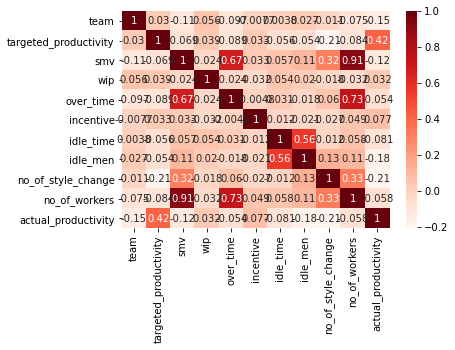

In [6]:
sp.heatmap(df.corr(),annot=True,cmap=pl.cm.Reds)
pl.show()

In [7]:
#outliers
q1=np.percentile(df['actual_productivity'],25,interpolation="midpoint")
q2=np.percentile(df['actual_productivity'],50,interpolation="midpoint")
q3=np.percentile(df['actual_productivity'],100,interpolation="midpoint")

print(q1)
print(q2)
print(q3)

0.650307143
0.773333333
1.1204375


In [8]:

df=df.drop(['quarter','department','day'],axis=1)

In [9]:
df.head()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,8,0.80,26.16,1009,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,1,0.75,3.94,1056,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,11,0.80,11.41,953,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,12,0.80,11.41,948,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,6,0.80,25.90,905,1920,50,0.0,0,0,56.0,0.800382


In [10]:
X=df[['no_of_workers']] #indepented
Y=df['incentive']   #depentend

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.8,random_state=104,shuffle=True)

In [12]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [13]:
Y_pred=reg.predict(X_test)
print(Y_pred)

[13.14016964 11.83759157 14.4427477  43.75075412 43.75075412 43.75075412
 44.40204315 45.05333218 44.40204315 45.05333218 41.79688702 44.40204315
 11.83759157 16.39661479 16.39661479 18.35048189 44.40204315 43.75075412
 43.75075412 41.14559799 44.40204315 44.40204315 44.07639863 11.83759157
 44.40204315 28.77110639 43.75075412 42.44817605 44.40204315 35.93528574
 43.09946508 11.83759157 43.75075412 40.49430896 11.83759157 27.14288381
 12.4888806  42.44817605 11.83759157 11.83759157 41.79688702 12.4888806
 44.40204315 43.4251096  14.4427477  27.14288381 42.44817605 11.83759157
 11.83759157 43.4251096  43.09946508 44.72768766 40.49430896 14.4427477
 44.07639863 44.07639863 40.49430896 44.40204315 11.83759157 11.83759157
 45.05333218 44.40204315 28.77110639 27.14288381 45.37897669 11.83759157
 11.83759157 28.77110639 11.83759157 11.83759157 43.75075412 40.49430896
 45.05333218 11.83759157 43.75075412 11.83759157 44.72768766 45.70462121
 11.83759157 16.39661479 43.75075412 11.83759157 45.0

In [14]:
Y_test

480      0
529      0
459      0
381     50
362     63
        ..
183     38
72      50
104      0
955      0
1088    75
Name: incentive, Length: 958, dtype: int64

In [15]:
from sklearn.metrics import *
mse=mean_squared_error(Y_test,Y_pred)
rmse=mean_squared_error(Y_test,Y_pred,squared=False)
r2=r2_score(Y_test,Y_pred)

print("MSE :",mse)
print("RMSE :",rmse)
print("R2   :",r2)

MSE : 30799.128127659515
RMSE : 175.49680375340034
R2   : -0.004909054639347765


In [17]:
trainscoree=reg.score(X_train,Y_train)
test_socre=reg.score(X_test,Y_test)
print("train score",trainscoree)
print("test score",test_socre)


train score 0.03718593880999488
test score -0.004909054639347765


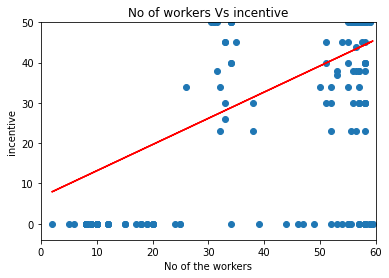

In [16]:
pl.scatter(X_train,Y_train)
pl.plot(X_train,reg.predict(X_train),color='Red')
pl.title("No of workers Vs incentive")
pl.xlabel("No of the workers")
pl.ylabel("incentive")
pl.ylim(-4,50)
pl.xlim(0,60)
pl.show()


In [26]:
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=2)
x_pol=pol.fit_transform(X)
lin2=LinearRegression()
lin2.fit(x_pol,Y)

LinearRegression()